## 必要なライブラリのインストール

In [11]:
!pip install opencv-python-headless
!pip install numpy

In [12]:
!pip freeze|grep opencv

opencv-python-headless==4.8.0.76


## カメラの位置合わせ

類似点上位十点の座標のズレと十点のズレの平均値を表示

Match 1:
    Shift in x direction: -5.97198486328125 pixels, x1: 385.1920471191406, x2: 379.2200622558594
    Shift in y direction: 65.691650390625 pixels, y1: 707.6784057617188, y2: 773.3700561523438
Match 2:
    Shift in x direction: -4.976654052734375 pixels, x1: 378.2247314453125, x2: 373.2480773925781
    Shift in y direction: 67.1846923828125 pixels, y1: 704.1947021484375, y2: 771.37939453125
Match 3:
    Shift in x direction: 9.953277587890625 pixels, x1: 370.759765625, x2: 380.7130432128906
    Shift in y direction: 72.16131591796875 pixels, y1: 525.03564453125, y2: 597.1969604492188
Match 4:
    Shift in x direction: 10.368011474609375 pixels, x1: 352.5120544433594, x2: 362.88006591796875
    Shift in y direction: 74.649658203125 pixels, y1: 572.3136596679688, y2: 646.9633178710938
Match 5:
    Shift in x direction: 9.953277587890625 pixels, x1: 363.2947998046875, x2: 373.2480773925781
    Shift in y direction: 74.64959716796875 pixels, y1: 534.9889526367188, y2: 609.638549804

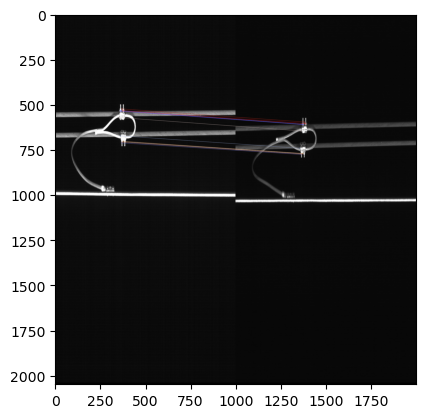

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# 画像を読み込む
img1 = cv2.imread('2022_0599_HD11_01_00012455.jpg', 0) # 基準画像
img2 = cv2.imread('2022_0599_HD12_01_00012455.jpg', 0) # 位置合わせする画像
# ORBディテクターを初期化する
orb = cv2.ORB_create()
# キーポイントとディスクリプタを見つける
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)
# BFマッチャーを初期化する
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# マッチングを行う
matches = bf.match(des1, des2)
# マッチングの結果を距離によってソートする
matches = sorted(matches, key=lambda x:x.distance)
# マッチングの結果を描画する
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
# 各点でのx方向とy方向のずれを計算して表示する
for i, match in enumerate(matches[:10]):
    # キーポイントの座標を取得する
    x1, y1 = kp1[match.queryIdx].pt
    x2, y2 = kp2[match.trainIdx].pt
    # ずれを計算する
    dx = x2 - x1
    dy = y2 - y1
    # ずれを計算する（平均用）
    dxs.append(x2 - x1)
    dys.append(y2 - y1)

    # ずれを表示する
    print(f'Match {i+1}:')
    print(f'    Shift in x direction: {dx} pixels, x1: {x1}, x2: {x2}')
    print(f'    Shift in y direction: {dy} pixels, y1: {y1}, y2: {y2}')
# ずれの平均値を計算して表示する
mean_dx = np.mean(dxs)
mean_dy = np.mean(dys)
print(f'Mean shift in x direction: {mean_dx} pixels')
print(f'Mean shift in y direction: {mean_dy} pixels')
# 結果を表示する
plt.imshow(img3)
plt.show()

HD12はHD11より右に2pixelずれている